# フーリエ変換ちょっと
- 1のn乗根のplot(高校数学)
- nを標本点の数としたフーリエ変換行列作り
- 任意の線型フィルタはフーリエ変換行列で対角化できる(できてない)
- 窓関数プロットするだけ(numpy)
- 正規乱数の平均は0(numpyがね)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
N = 6
w = np.exp(-2*np.pi/N*1j)
w**N

(1.0000000000000002+8.326672684688674e-16j)

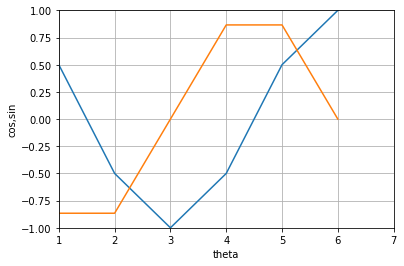

In [116]:
# 実部はcos、虚部はsin
real_imag = []
r = []
im = []
for i in range(N+1):
    r.append((w**i).real)
    im.append((w**i).imag)
    real_imag.append(((w**i).real, (w**i).imag))
plt.xlim(1,N+1)
plt.xlabel("theta")
plt.ylim(-1,1)
plt.ylabel("cos,sin")
plt.grid()
plt.plot(real_imag)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


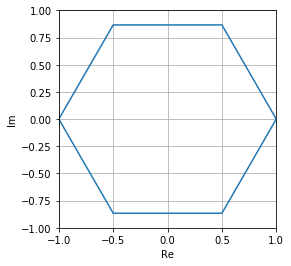

In [117]:
# 正n角形

plt.xlim(-1,1)
plt.xlabel("Re")
plt.ylim(-1,1)
plt.ylabel("Im")
plt.grid()
plt.axes().set_aspect('equal')
plt.plot(r,im)

7
{0: True, (1.4999999999999996+0.8660254037844392j): True, (1.5-0.8660254037844386j): True, (-1.1102230246251565e-15+1.7320508075688776j): True, (-1.4999999999999998-0.8660254037844393j): True, (3.3306690738754696e-16-1.7320508075688774j): True, (-1.5000000000000004+0.8660254037844382j): True}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


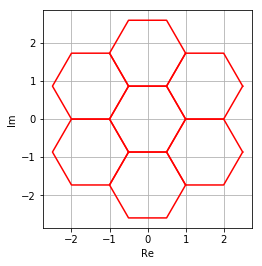

In [142]:
# 辺を共有させる
plt.grid()
plt.axes().set_aspect('equal')
plt.ylabel("Im")
plt.xlabel("Re")
# K層
K = 2
# 原点
center = set([0])
cnt = 0
memo = {}
for _ in range(K):
    # 次の中心は辺の数
    nextc = [0 for _ in range(N**(_+1))]
    nextc = set()
    for c in center:
        if c in memo:
            continue
        else:
            memo[c] = True
        if cnt == 17:
            break
        cnt += 1
        p = np.zeros(N+1,dtype='complex128')
        # 最初の計算用に最後は先に計算しておく
        p[0], p[N] = c+1, c+1
        p[N-1] = c + w**(N-1)
        nextc.add(p[N]+p[N-1])
        for i in range(1,N):
            p[i] = c + w**i
            if (p[i] + p[i-1]) in memo:
                continue
            else:
                memo[(p[i] + p[i-1])] = True
                nextc.add((p[i] + p[i-1]))
        plt.plot(p.real,p.imag,'r')
    center = nextc
print(cnt)
print(memo)

False

In [49]:
# Fourier matrix
F = np.array([[w**(-i*k) for k in range(N)] for i in range(N)])
F

array([[ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  7.07106781e-01+7.07106781e-01j,
         2.22044605e-16+1.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
        -1.00000000e+00+4.44089210e-16j, -7.07106781e-01-7.07106781e-01j,
        -6.66133815e-16-1.00000000e+00j,  7.07106781e-01-7.07106781e-01j],
       [ 1.00000000e+00+0.00000000e+00j,  2.22044605e-16+1.00000000e+00j,
        -1.00000000e+00+4.44089210e-16j, -6.66133815e-16-1.00000000e+00j,
         1.00000000e+00-8.88178420e-16j,  1.11022302e-15+1.00000000e+00j,
        -1.00000000e+00+1.33226763e-15j, -1.55431223e-15-1.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
        -6.66133815e-16-1.00000000e

In [50]:
F_inv = F.conjugate()/N
F_inv

array([[ 1.25000000e-01-0.00000000e+00j,  1.25000000e-01-0.00000000e+00j,
         1.25000000e-01-0.00000000e+00j,  1.25000000e-01-0.00000000e+00j,
         1.25000000e-01-0.00000000e+00j,  1.25000000e-01-0.00000000e+00j,
         1.25000000e-01-0.00000000e+00j,  1.25000000e-01-0.00000000e+00j],
       [ 1.25000000e-01-0.00000000e+00j,  8.83883476e-02-8.83883476e-02j,
         2.77555756e-17-1.25000000e-01j, -8.83883476e-02-8.83883476e-02j,
        -1.25000000e-01-5.55111512e-17j, -8.83883476e-02+8.83883476e-02j,
        -8.32667268e-17+1.25000000e-01j,  8.83883476e-02+8.83883476e-02j],
       [ 1.25000000e-01-0.00000000e+00j,  2.77555756e-17-1.25000000e-01j,
        -1.25000000e-01-5.55111512e-17j, -8.32667268e-17+1.25000000e-01j,
         1.25000000e-01+1.11022302e-16j,  1.38777878e-16-1.25000000e-01j,
        -1.25000000e-01-1.66533454e-16j, -1.94289029e-16+1.25000000e-01j],
       [ 1.25000000e-01-0.00000000e+00j, -8.83883476e-02-8.83883476e-02j,
        -8.32667268e-17+1.25000000e

In [51]:
# low-pass filter
D = np.array([4,3,2,1,0,1,2,3])
h = F_inv@D

In [52]:
h = [v.real if v.real > 10e-8 else 0 for v in h ]
h

[2.0,
 0.8535533905932734,
 0,
 0.146446609406726,
 0,
 0.1464466094067266,
 0,
 0.853553390593276]

In [53]:
# linear phase filter
h = h[5:] + h[:5]
h

[0.1464466094067266,
 0,
 0.853553390593276,
 2.0,
 0.8535533905932734,
 0,
 0.146446609406726,
 0]

In [59]:
h = [1,4,5,0,0,0,0,0]
H = np.array([[h[(i%(N))] for i in range(j,N+j)] for j in range(N)])

In [60]:
F_inv@H@F < 10e-9

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True,  True,  True,  True]])

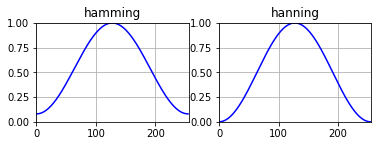

In [3]:
import numpy as np
import matplotlib.pyplot as plt
N = 256

plt.subplot(221)
plt.grid(True)
plt.xlim(0,N)
plt.ylim(0,1)
plt.title("hamming")
plt.plot(np.hamming(N),"b")
plt.subplot(222)
plt.grid(True)
plt.xlim(0,N)
plt.ylim(0,1)
plt.title("hanning")
plt.plot(np.hanning(N),"b")
# plt.subplot(223)
# plt.grid(True)
# plt.xlim(-2,2)
# plt.ylim(-2,2)
# plt.plot(-1,1,"rx")
# plt.subplot(224)
# plt.grid(True)
# plt.xlim(-2,2)
# plt.ylim(-2,2)
# plt.plot(-1,-1,"bo")

Text(0.5, 1.0, 'N:10000ave:0.012491262426003713')

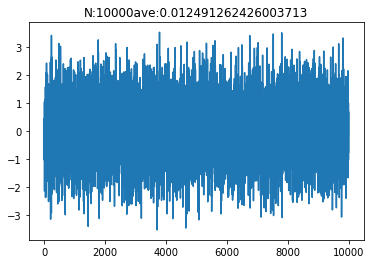

In [4]:
# random average
N = 10000
n = np.random.randn(N)
plt.plot(n)

mean = sum(n)/N
plt.title("N:" + str(N) + "ave:" + str(mean))